### Q1 (a)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

final w: 
 [-11.81335475   1.5563923    1.50089075]
Mean squared error:  0.0007322200747700431


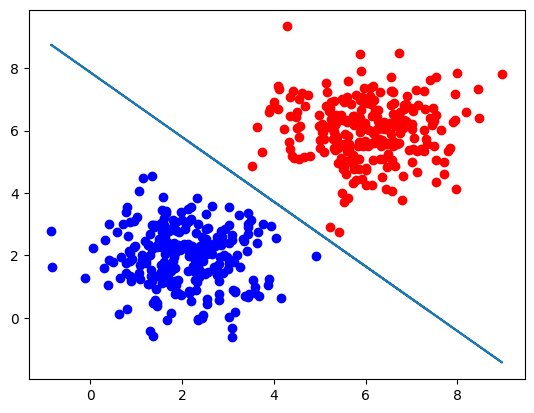

In [26]:
file  = open("C:/Users/Anish Mulay/Documents/2nd Year/ED5340 - DS\LAB/LAB10_ED21B011/Logistic_regression_ls.csv")

class LogisticRegression:
    def __init__(self,dataset,n):
        self.df = pd.read_csv(dataset)
        self.x_train_pd = self.df.iloc[:,0]
        # self.x_train_pd = np.append(self.x_train_pd,df.iloc[:,1])
        
        self.x_train = np.array([self.x_train_pd.to_numpy()])
        self.x_train = np.insert(self.x_train,[0],[[1],],axis = 0)
        self.x_train = np.insert(self.x_train,[2],[(self.df.iloc[:,1]).to_numpy(),],axis = 0)
        # self.x_train = np.append(self.x_train, [(df.iloc[:1]).to_numpy()])
        self.y_train_pd = self.df.iloc[:,-1]
        self.y_train = self.y_train_pd.to_numpy()
        # print("x :\n",self.x_train)
        # print("y: \n",self.y_train)

        self.m = self.y_train.shape[0]
        self.w_start = np.array([1]*n)
        self.starting_point = self.w_start

    def DecisionBoundary(self,w):
        
        self.decision_boundary = (w*self.x_train.transpose())
        
        self.decision_boundary = np.array([np.sum(row) for row in self.decision_boundary])
        shape = w.shape
        # print(shape)
        # print("decision boundary: \n",self.decision_boundary)
        # print(self.decision_boundary)
        return (self.decision_boundary)
    
    def PlotDecisionBoundary(self,w):
        x1 = self.x_train[1]
        x2 = ((-w[:2])*self.x_train[:2].transpose())/w[2]
        
        x2 = np.array([np.sum(row) for row in x2])
        
        plt.plot(x1,x2)
        # print(x2)
    
    def SigmoidFunction(self,w):
        sf = 1/(1+ np.exp(-self.DecisionBoundary(w)))
        # print(sf.transpose().shape)
        return (sf)
    
    def Plot_x1_x2(self,):
        
        # plt.scatter(x1,x2,color = "red")
        plt.scatter(self.df[self.df.label==0].x1, self.df[self.df.label==0].x2, color = "blue")
        plt.scatter(self.df[self.df.label==1].x1, self.df[self.df.label==1].x2, color = "red")
        # plt.plot(*self.decision_boundary)

    

    
    def CostFunction(self,point):
        j =( -self.y_train*(np.log10(self.SigmoidFunction(point))) - (1-self.y_train)*(np.log10(1-self.SigmoidFunction(point))))/(self.m)
        j = np.sum(j)
        print("cost: \n",j)
    
    def gradCost(self,w):
        # print("x shape: ",self.x_train.transpose().shape)
        grad_j = ((self.SigmoidFunction(w) - self.y_train).transpose())*(self.x_train)/self.m
        grad_j = np.array([np.sum(row) for row in grad_j])
        # print("grad_j: ",grad_j.shape)
        # print("grad_j: \n",grad_j)
        return (grad_j)

    def new_point(self,starting_point,alpha):
        # print("gradient: ",self.gradCost(starting_point))
        return(starting_point - alpha * self.gradCost(starting_point).transpose())
    
    def sgd_const_alpha(self,alpha):
        
        new_Ws = []
        i=0
        while i < 10000:
            self.starting_point2 = self.new_point(starting_point = self.starting_point,alpha = alpha)
            self.starting_point = self.starting_point2
            i+=1
        
        self.final_w = self.starting_point2
        print("final w: \n",self.starting_point2)
        self.PlotDecisionBoundary(w = self.final_w)
    
    def MSE(self):
        error = (self.SigmoidFunction(w = self.final_w) - self.y_train)**2/(2*self.m)
        error = np.sum(error)
        print("Mean squared error: ",error)



obj = LogisticRegression(file,3)
obj.DecisionBoundary(np.array([1,1,1]))
# sigmoid_function = obj.SigmoidFunction()
# print("sigmoid function: \n",sigmoid_function)

obj.Plot_x1_x2()
# obj.CostFunction()
# gradient = obj.gradCost()
# print("gradient", gradient)

obj.sgd_const_alpha(0.1)
obj.MSE()



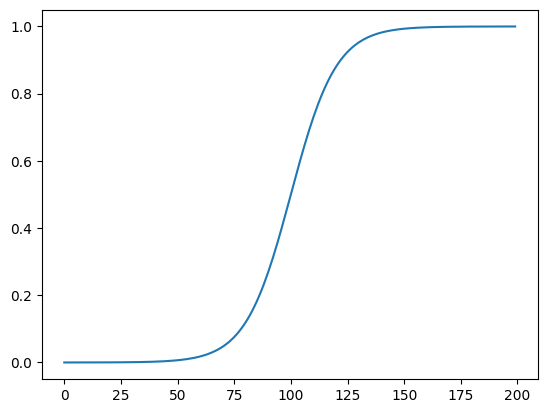

In [27]:
def PlotSigmoid():
        z = np.arange(-10,10,0.1)
        plt.plot(1/(1+np.exp(-z)))
        plt.show()

PlotSigmoid()